In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

# Introducing Scikit-Learn

In [2]:
iris = sns.load_dataset('iris')
display(iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


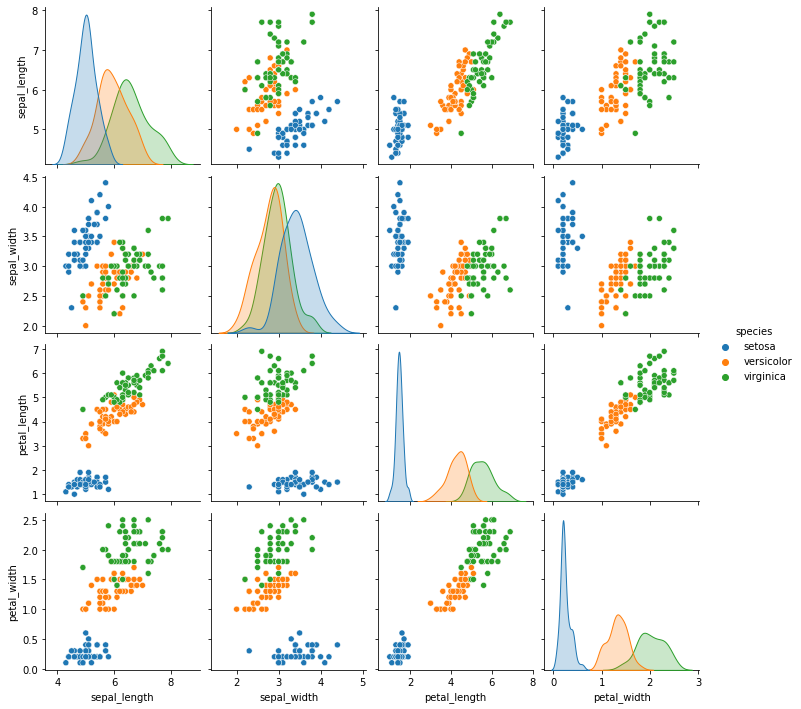

In [4]:
sns.pairplot(iris, hue='species')
graph.show()

In [7]:
x_iris = iris.drop('species', axis=1)
y_iris = iris['species']
y_iris = y_iris[:, np.newaxis]

print(x_iris.shape)
print(y_iris.shape)

(150, 4)
(150, 1)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, random_state=1)

##### Example of supervised

In [10]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9736842105263158


##### Example of unsupervised

In [13]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(x_iris)
x_2d = model.transform(x_iris)
display(x_2d)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


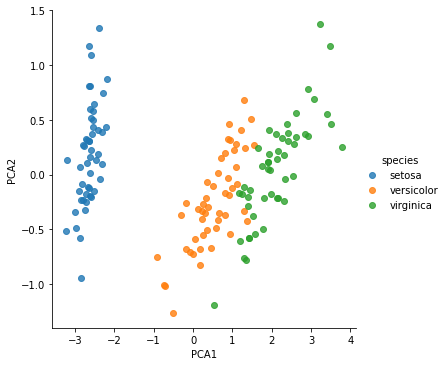

In [16]:
iris['PCA1'] = x_2d[:, 0]
iris['PCA2'] = x_2d[:, 1]

sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)
graph.show()

In [18]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(x_iris)
y_pred = model.predict(x_iris)

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


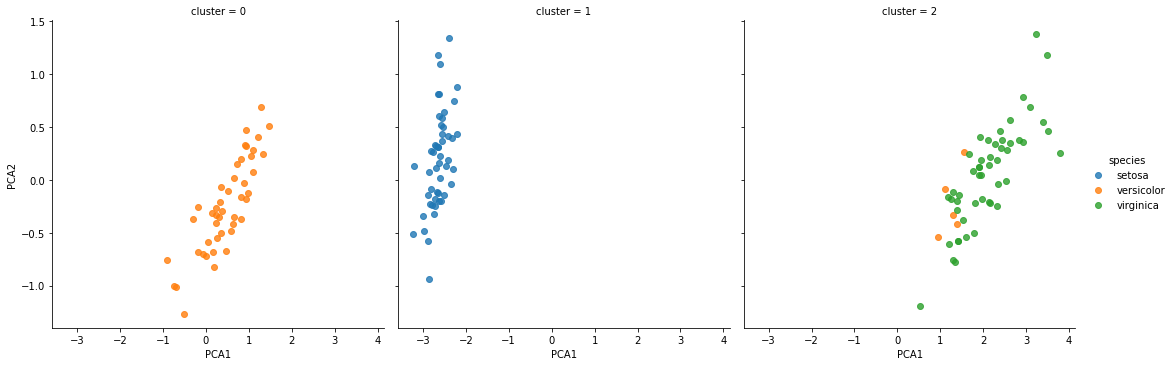

In [19]:
iris['cluster'] = y_pred

sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False)
graph.show()

#### Hand Written Digits
###### Dimensionality Reduction

In [20]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

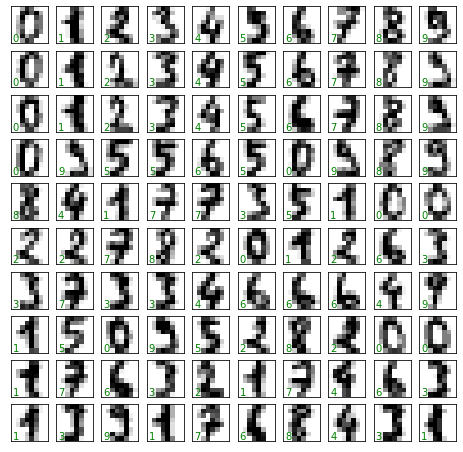

In [23]:
fig, axes = graph.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks': [], 'yticks': []}, 
                           gridspec_kw = dict(hspace=0.2, wspace=0.2))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [25]:
x = digits.data
y = digits.target

print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [27]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

(1797, 2)


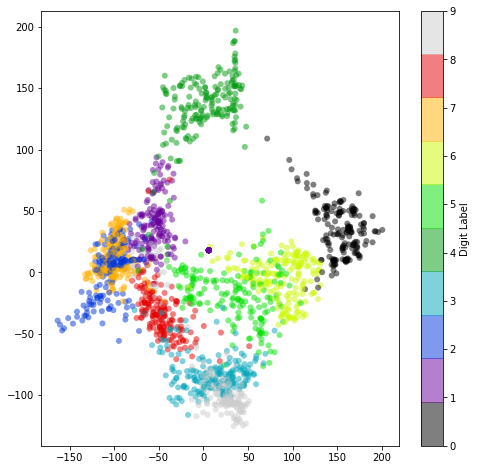

In [32]:
graph.figure(figsize=(8, 8))
graph.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolors='none', alpha=0.5, 
              cmap=graph.cm.get_cmap('nipy_spectral', 10))

graph.colorbar(label = 'Digit Label', ticks=range(10))
graph.show()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [34]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [35]:
accuracy_score(y_test, y_pred)

0.8333333333333334

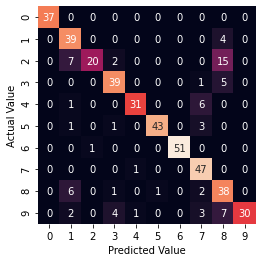

In [36]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
graph.xlabel('Predicted Value')
graph.ylabel('Actual Value')
graph.show()

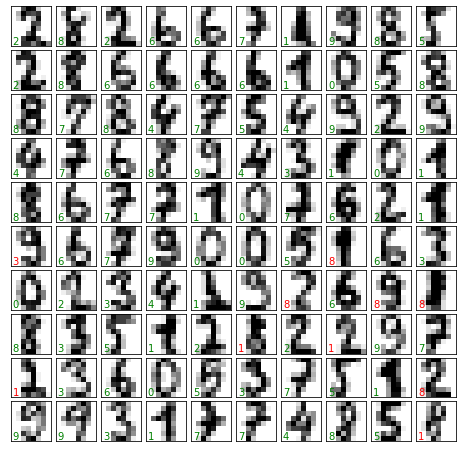

In [38]:
fig, axes = graph.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = x_test.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_pred[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_pred[i]) else 'red')

# Hyperparameters and model validation

Model validation can be done using train test split. However, we have a holdout set and that decreases our sample size.
We can use cross validation, where subset of data is used as training set and validation set

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5)

array([0.78055556, 0.78333333, 0.79387187, 0.8718663 , 0.80501393])

In [42]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, x, y, cv=LeaveOneOut())
print(scores.mean())

0.8408458542014469


## Selecting Best Model

Find best spot between variance and trade-off.

Underfitting = high bias

Overfitting = high variance

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [44]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

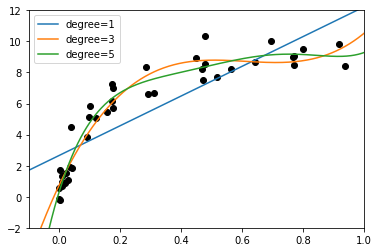

In [45]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

graph.scatter(X.ravel(), y, color='black')
axis = graph.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    graph.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
graph.xlim(-0.1, 1.0)
graph.ylim(-2, 12)
graph.legend(loc='best');


Text(0, 0.5, 'score')

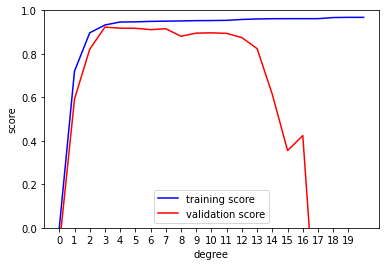

In [48]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

graph.plot(degree, np.median(train_score, 1), color='blue', label='training score')
graph.plot(degree, np.median(val_score, 1), color='red', label='validation score')
graph.legend(loc='best')
graph.ylim(0, 1)
graph.xticks(range(20))
graph.xlabel('degree')
graph.ylabel('score')

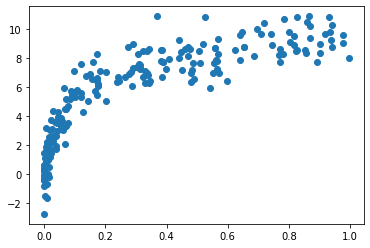

In [49]:
X2, y2 = make_data(200)
graph.scatter(X2.ravel(), y2)
graph.show()

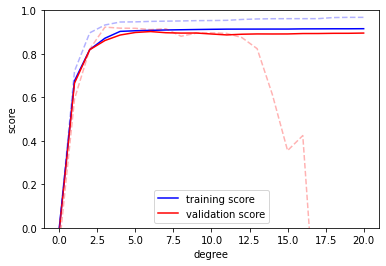

In [54]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

graph.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
graph.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
graph.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
graph.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
graph.legend(loc='lower center')
graph.ylim(0, 1)
graph.xlabel('degree')
graph.ylabel('score')
graph.show()

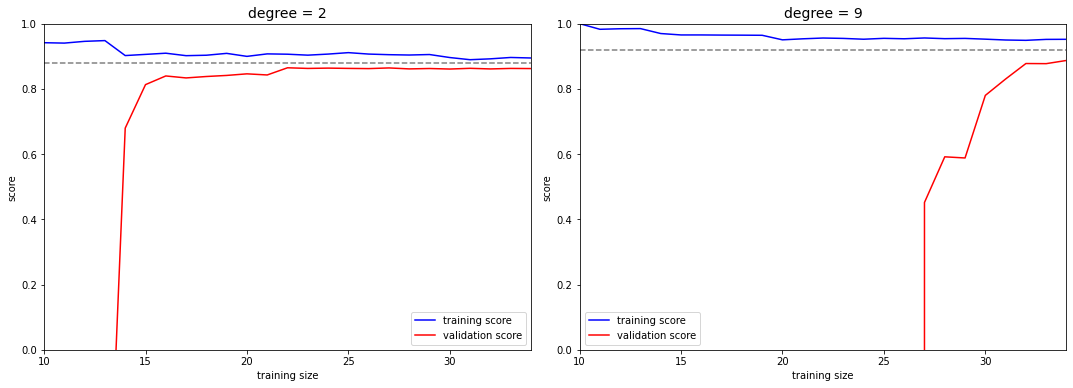

In [56]:
from sklearn.model_selection import learning_curve

fig, ax = graph.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [59]:
grid.fit(X, y)
print(grid.best_params_)

{'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 4}


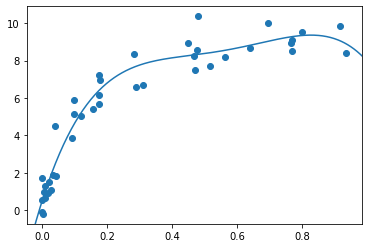

In [62]:
model = grid.best_estimator_

graph.scatter(X.ravel(), y)
lim = graph.axis()
y_test = model.fit(X, y).predict(X_test)
graph.plot(X_test.ravel(), y_test)
graph.axis(lim)
graph.show()

# Feature Engineering

### Categorical Features

In [64]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
print(data)

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'}, {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'}, {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'}, {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]


Hot Encoding

In [66]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
print(vec.fit_transform(data))
print(vec.get_feature_names())

[[     0      1      0 850000      4]
 [     1      0      0 700000      3]
 [     0      0      1 650000      3]
 [     1      0      0 600000      2]]
['neighborhood=Fremont', 'neighborhood=Queen Anne', 'neighborhood=Wallingford', 'price', 'rooms']


In [67]:
# Sparse can be good here because we have mostly zeroes

In [68]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

## Text Features

In [69]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Derived Features

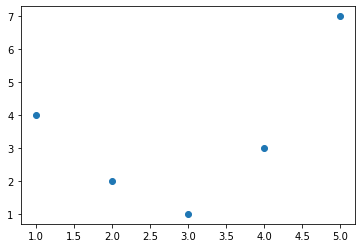

In [73]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

graph.scatter(x, y)
graph.show()

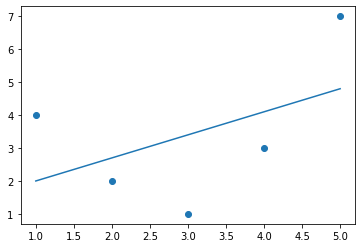

In [74]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)

graph.scatter(x, y)
graph.plot(x, yfit)
graph.show()

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


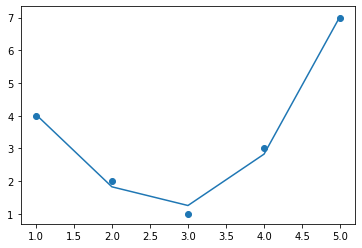

In [77]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)

graph.scatter(x, y)
graph.plot(x, yfit)
graph.show()

## Imputation of missing data

In [80]:
X = np.array([[ np.nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   np.nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [85]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [86]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## Feature Pipelines

In [88]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [89]:
model.fit(X, y) 
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
